# Deliverable 6

Press Shift-Enter to execute all code.

# Introduction

In this notebook we will use logistic regression to fit a classification model that predicts an individual's ancestry based on a set of their genetic data with 10 prinicipal components. We will manually implement logistic regression to accomplish this as well as use existing libraries.

First we import the relevant libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

Next we read our dataset into a Pandas dataframe:

In [2]:
data=pd.read_csv('TrainingData_N183_p10.csv')

Next we separate out our features for training from our response (ground truth) vector:

In [3]:
components=data.drop(['Ancestry'], axis=1)
y=data['Ancestry']

Next we standardize our features with the following function:

In [2]:
def standardize(data):
    for col_name in data.columns:
        data[col_name]-=np.mean(data[col_name])
        data[col_name]/=np.std(data[col_name])    
    return data

In [5]:
components=standardize(components)
components=np.array(components)

Then we one-hot encode our response vector:

In [6]:
y=y.astype('category')
y=pd.get_dummies(y)
Y=np.array(y)

Next we define our logistic regression function:

In [3]:
def logistic_regression(train_data, Y, lamb, alpha=1e-5, iterations=10000):
    augment=np.empty((len(train_data), 1))

    for i in range(len(train_data)):
        augment[i][0]=1

    X=np.hstack((augment, train_data))
    
    B=np.zeros((11, 5))    
    
    for i in tqdm(range(iterations)):                
        XB=np.dot(X, B)    
        U=np.exp(XB)
        
        P=np.empty((len(train_data), 5))
        
        for j in range(len(P)):
            for k in range(5):
                P[j][k]=U[j][k]
                P[j][k]/=np.sum(U, axis=1)[j]
        
        Z_top=B[0, :]
        Z_bottom=np.zeros((10, 5))
        Z=np.vstack((Z_top, Z_bottom))
                
        B_minus_Z=np.subtract(B, Z)
        two_lambda_B_minus_Z=np.multiply(2*lamb, B_minus_Z)
        Y_minus_P=np.subtract(Y, P)
        X_T=np.transpose(X)
        X_T_Y_minus_P=np.dot(X_T, Y_minus_P)
        B_update=np.subtract(X_T_Y_minus_P, two_lambda_B_minus_Z)
        B_update_scaled=np.multiply(alpha, B_update)
        new_B=np.add(B, B_update_scaled)
        B=new_B
    B_hat=B
    return B_hat

# Deliverable 1

Illustrate the effect of the tuning parameter on the inferred ridge regression coefficients by generating five plots (one for each of the 𝐾=5 ancestry classes) of 10 lines (one for each of the 𝑝=10 features), with the 𝑦-axis as 𝛽̂ 𝑗𝑘, 𝑗=1,2,…,10 for the graph of class 𝑘, and 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular 𝛽̂
𝑗𝑘. Label both axes. Without the log scaling of the tuning parameter, the plot will look distorted.

In [8]:
lambdas=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
B_list=[]

for lamb in tqdm(lambdas):
    B_biased=logistic_regression(components, Y, lamb)
    B_1=B_biased[1:, 0]
    B_list.append(B_1)
    B_2=B_biased[1:, 1]
    B_list.append(B_2)
    B_3=B_biased[1:, 2]
    B_list.append(B_3)
    B_4=B_biased[1:, 3]
    B_list.append(B_4)
    B_5=B_biased[1:, 4]
    B_list.append(B_5)

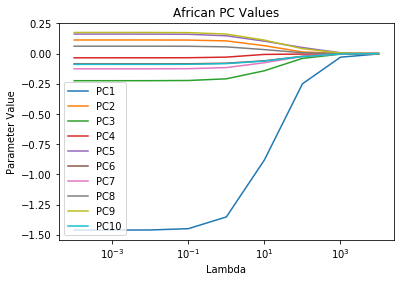

In [9]:
Bs=pd.DataFrame([B_list[0], B_list[5], B_list[10], B_list[15], B_list[20], B_list[25], B_list[30], B_list[35], B_list[40]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('African PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

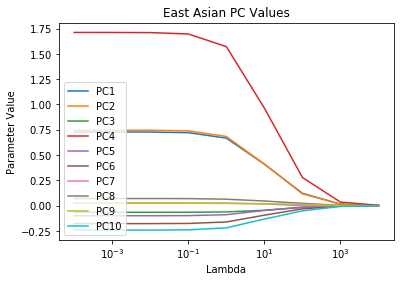

In [10]:
Bs=pd.DataFrame([B_list[1], B_list[6], B_list[11], B_list[16], B_list[21], B_list[26], B_list[31], B_list[36], B_list[41]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('East Asian PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

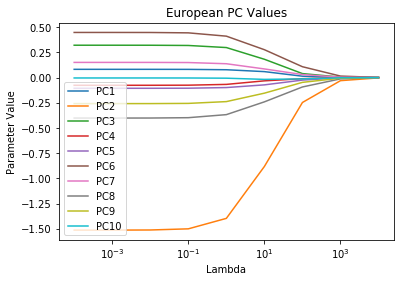

In [11]:
Bs=pd.DataFrame([B_list[2], B_list[7], B_list[12], B_list[17], B_list[22], B_list[27], B_list[32], B_list[37], B_list[42]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('European PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

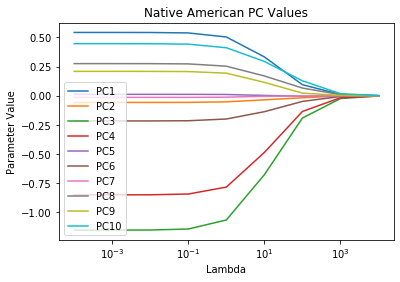

In [12]:
Bs=pd.DataFrame([B_list[3], B_list[8], B_list[13], B_list[18], B_list[23], B_list[28], B_list[33], B_list[38], B_list[43]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('Native American PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

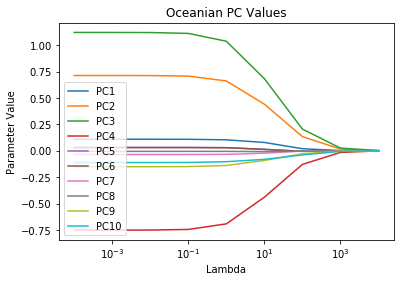

In [13]:
Bs=pd.DataFrame([B_list[4], B_list[9], B_list[14], B_list[19], B_list[24], B_list[29], B_list[34], B_list[39], B_list[44]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('Oceanian PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

# Deliverable 2

Illustrate the effect of the tuning parameter on the cross validation error by generating a plot with the 𝑦-axis as CV(5) error, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. Label both axes in the plot. Without the log scaling of the tuning parameter 𝜆, the plots will look distorted.

In [14]:
from math import floor, ceil

In [15]:
data=pd.read_csv('TrainingData_N183_p10.csv')

In [16]:
data = data.sample(frac=1).reset_index(drop=True)

In [17]:
components=data.drop(['Ancestry'], axis=1)
y=data['Ancestry']

In [18]:
y=y.astype('category')
y=pd.get_dummies(y)

In [7]:
def standardize_validation(train, val):
    for col_name in val.columns:
        val[col_name]-=np.mean(train[col_name])
        val[col_name]/=np.std(train[col_name])    
    return val

In [8]:
def cross_validation_split(data, y, fold_no):    
    if fold_no==0 or fold_no==1 or fold_no==2:
        val_data=data.sample(ceil(len(data)*0.2))
        train_data=data.drop(val_data.index)
        val_labels=y.iloc[val_data.index]
        train_labels=y.drop(val_data.index)
        
        val_data=standardize_validation(train_data, val_data)
        
        train_data=standardize(train_data)
        
        return train_data, train_labels, val_data, val_labels
    else:
        val_data=data.sample(floor(len(data)*0.2))
        train_data=data.drop(val_data.index)
        val_labels=y.iloc[val_data.index]
        train_labels=y.drop(val_data.index)
        
        val_data=standardize_validation(train_data, val_data)
        
        train_data=standardize(train_data)
        
        return train_data, train_labels, val_data, val_labels

In [4]:
def predict(val, B):
    prediction_product=np.dot(val, B[1:])
    bias=B[0, :]
    prediction_biased=np.add(bias, prediction_product)
    prediction_numerator=np.exp(prediction_biased)
    prediction_denominator=np.sum(np.exp(prediction_biased), axis=0)
    predictions=prediction_numerator/prediction_denominator
    return predictions

In [5]:
def compute_categorical_crossentropy(y_true, y_pred, epsilon=1e-9):
    y_pred=np.clip(y_pred, epsilon, 1-epsilon)
    N=len(y_pred)    
    ce=-np.sum(y_true*np.log(predictions))/N
    return ce

In [24]:
lambdas=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
ce_list=[]

for i in tqdm(range(5)):
    train_data=data.drop(['Ancestry'], axis=1)
    y=data['Ancestry']
    y=pd.get_dummies(y)
    train_data, train_labels, val_data, val_labels=cross_validation_split(train_data, y, i)    
    train_data=np.array(train_data)
    train_labels=np.array(train_labels)
    val_data=np.array(val_data)
    val_labels=np.array(val_labels)
    for lamb in tqdm(lambdas):
        B=logistic_regression(train_data, train_labels, lamb)
        predictions=predict(val_data, B)
        ce=compute_categorical_crossentropy(val_labels, predictions)
        ce_list.append(ce)

In [25]:
ce_average_list=[]

for i in range(9):
    ce_average_list.append((ce_list[i]+ce_list[i+9]+ce_list[i+18]+ce_list[i+27]+ce_list[i+36])/5)

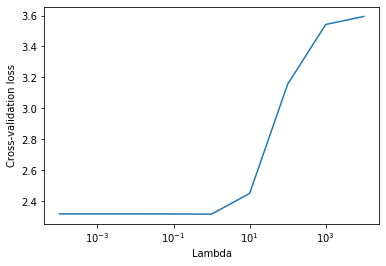

In [27]:
plt.plot(lambdas, ce_average_list)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation loss')
plt.show()

# Deliverable 3

Indicate the value of 𝜆 value that generated the smallest CV(5) error.

In [29]:
print(np.min(ce_average_list))
print(np.argmin(ce_average_list))

2.3143351830845136
4


According to these results, even though there is minimal variance between $10^{-4}$ and $1$, the lambda value that produced the lowest loss is 1.

# Deliverable 4

Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁=183 observations to obtain an estimate of the (𝑝+1)×𝐾 model parameter matrix as 𝐁̂ and make predictions of the probability for each of the 𝐾=5 classes for the 111 test individuals located in TestData_N111_p10.csv. Report all six values (probability for each of the 𝐾=5 classes and the most probable ancestry label) for all 111 test individuals.

In [6]:
data=pd.read_csv('TrainingData_N183_p10.csv')

In [7]:
components=data.drop(['Ancestry'], axis=1)
y=data['Ancestry']

In [8]:
components=standardize(components)
components=np.array(components)

In [9]:
y=y.astype('category')
y=pd.get_dummies(y)
Y=np.array(y)

In [10]:
B=logistic_regression(components, Y, 1)
B

array([[-0.26024251,  0.58255176, -0.01548264, -0.0639522 , -0.24287442],
       [-1.35264373,  0.66753972,  0.07772996,  0.50369293,  0.10368112],
       [ 0.10508113,  0.68388189, -1.39760085, -0.05204409,  0.66068191],
       [-0.20876493, -0.06136931,  0.29789329, -1.0643503 ,  1.03659125],
       [-0.02916587,  1.57166813, -0.06778062, -0.78269575, -0.69202589],
       [ 0.14752571, -0.08900116, -0.09920808,  0.01093108,  0.02975245],
       [-0.0794061 , -0.16088365,  0.41102129, -0.19924858,  0.02851704],
       [-0.11567828,  0.02476661,  0.13723457, -0.01227282, -0.03405007],
       [ 0.05596478,  0.06425057, -0.36796512,  0.25356051, -0.00581075],
       [ 0.16166374,  0.0227374 , -0.238611  ,  0.19363048, -0.13942061],
       [-0.08296518, -0.21875624, -0.00620664,  0.41146683, -0.10353876]])

In [11]:
test_data=pd.read_csv('TestData_N111_p10.csv')

In [12]:
test_components=test_data.drop(['Ancestry'], axis=1)
y_test=test_data['Ancestry']

In [13]:
y_test=y_test.astype('category')
y_test=pd.get_dummies(y_test)
Y_test=np.array(y_test)

In [19]:
prediction_probs=predict(test_components, B)
predictions=np.argmax(prediction_probs, axis=1)

prediction_probs=pd.DataFrame(prediction_probs)
prediction_probs.columns=['African', 'EastAsian', 'European', 'NativeAmerican', 'Oceanian']

predictions=pd.DataFrame(predictions)
predictions.columns=['Most Probable Class']

results=pd.concat([prediction_probs, predictions], axis=1)

classes=['African', 'EastAsian', 'European', 'NativeAmerican', 'Oceanian']

i=0
for index in results['Most Probable Class']:
    results['Most Probable Class'][i]=classes[index]
    i+=1
results

C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\mkell\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,African,EastAsian,European,NativeAmerican,Oceanian,Most Probable Class
0,2.709053e-10,2.050256e-08,2.724742e-06,1.678560e-08,9.999929e-01,Oceanian
1,1.355748e-11,1.476547e-07,2.117433e-05,9.108926e-01,6.579331e-09,NativeAmerican
2,1.042102e-09,5.480548e-07,1.778876e-01,1.423416e-07,1.756601e-08,European
3,7.097208e-02,1.879857e-10,1.550757e-06,1.710020e-08,7.180052e-07,African
4,6.470023e-11,9.999725e-01,3.760306e-07,1.591745e-06,6.559855e-09,EastAsian
...,...,...,...,...,...,...
106,1.986473e-01,4.530548e-10,2.589836e-06,2.911315e-08,3.743605e-08,African
107,7.334364e-04,2.825450e-09,3.083771e-04,2.699087e-08,1.472772e-08,African
108,5.050953e-03,1.944463e-09,3.472714e-06,3.197158e-07,2.329585e-08,African
109,8.901760e-04,1.367616e-10,4.830788e-05,1.294841e-06,3.335880e-08,African


# Deliverable 5

How do the class label probabilities differ for the Mexican and African American when compared to the class label probabilities for the unknown samples? Are these class probabilities telling us something about recent history? Explain why these class probabilities are reasonable with respect to knowledge of recent history.

Each of the unknown samples is distinct. The samples with African American ancestry are often labeled as African or European by our model. The Mexican samples are often labeled Native American or European. This makes sense since a lot of Africans were brought to Europe or the Americas via the slave trade. Also, what we now call "Mexicans" were originally Native Americans before Europeans came to their land, so it makes sense that there is a mixture of Native American and European ancestry among modern-day Mexican individuals.

# Deliverable 7

Implement the assignment using statistical or machine learning libraries in a language of your choice. Compare the results with those obtained above, and provide a discussion as to why you believe your results are different if you found them to be
different. 

## Standardization

In [29]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

In [30]:
data=pd.read_csv('TrainingData_N183_p10.csv')

In [31]:
components=data.drop(['Ancestry'], axis=1)
y=data['Ancestry']

In [32]:
standardize=StandardScaler()

X=standardize.fit_transform(components)
X=pd.DataFrame(X)

In [33]:
X.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [34]:
label_encoder=LabelEncoder()

Y=label_encoder.fit_transform(y)

## Deliverable 1

Illustrate the effect of the tuning parameter on the inferred ridge regression coefficients by generating five plots (one for each of the 𝐾=5 ancestry classes) of 10 lines (one for each of the 𝑝=10 features), with the 𝑦-axis as 𝛽̂ 𝑗𝑘, 𝑗=1,2,…,10 for the graph of class 𝑘, and 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular 𝛽̂
𝑗𝑘. Label both axes. Without the log scaling of the tuning parameter, the plot will look distorted.

In [35]:
lambdas=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
B_list=[]

for lamb in lambdas:
    logistic_regression=LogisticRegression(C=lamb, max_iter=10000)
    logistic_regression.fit(X, Y)
    B_T=logistic_regression.coef_
    B=np.transpose(B_T)
    B_list.append(B[0:, 0])
    B_list.append(B[0:, 1])
    B_list.append(B[0:, 2])
    B_list.append(B[0:, 3])
    B_list.append(B[0:, 4])

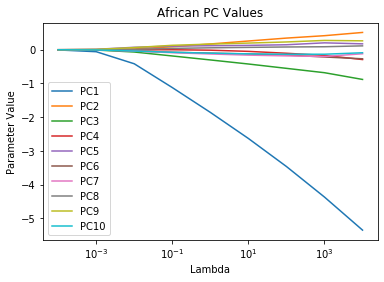

In [36]:
Bs=pd.DataFrame([B_list[0], B_list[5], B_list[10], B_list[15], B_list[20], B_list[25], B_list[30], B_list[35], B_list[40]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('African PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

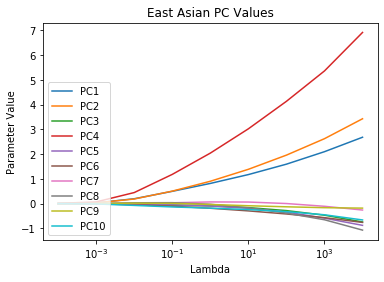

In [37]:
Bs=pd.DataFrame([B_list[1], B_list[6], B_list[11], B_list[16], B_list[21], B_list[26], B_list[31], B_list[36], B_list[41]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('East Asian PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

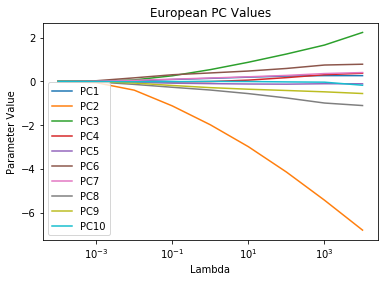

In [38]:
Bs=pd.DataFrame([B_list[2], B_list[7], B_list[12], B_list[17], B_list[22], B_list[27], B_list[32], B_list[37], B_list[42]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('European PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

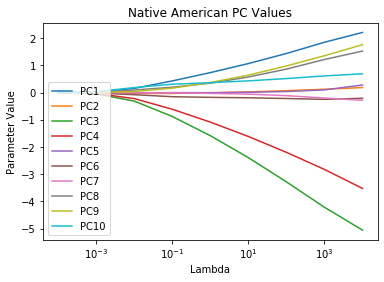

In [39]:
Bs=pd.DataFrame([B_list[3], B_list[8], B_list[13], B_list[18], B_list[23], B_list[28], B_list[33], B_list[38], B_list[43]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('Native American PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

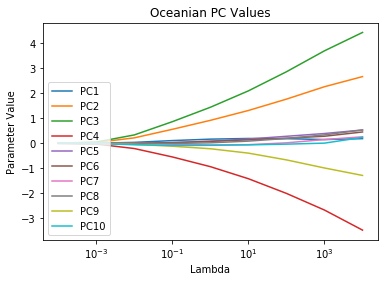

In [40]:
Bs=pd.DataFrame([B_list[4], B_list[9], B_list[14], B_list[19], B_list[24], B_list[29], B_list[34], B_list[39], B_list[44]])
Bs.index=lambdas
Bs.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
Bs.plot()
plt.title('Oceanian PC Values')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc='lower left')
plt.show()

## Deliverable 2 

Illustrate the effect of the tuning parameter on the cross validation error by generating a plot with the 𝑦-axis as CV(5) error, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular CV(5) error. Label both axes in the plot. Without the log scaling of the tuning parameter 𝜆, the plots will look distorted.

In [41]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

In [42]:
kfold=KFold(n_splits=5, shuffle=True)

In [43]:
X=np.asarray(X)
Y=np.asarray(Y)

In [44]:
loss_list=[]

for train, val in kfold.split(X, Y):
    for lamb in lambdas:
        logistic_regression=LogisticRegression(C=lamb, max_iter=10000)
        logistic_regression.fit(X[train], Y[train])
        probs=logistic_regression.predict_proba(X[val])
        loss=-log_loss(Y[val], probs)
        loss_list.append(loss)

In [45]:
loss_average_list=[]

for i in range(9):
    loss_average_list.append((loss_list[i]+loss_list[i+9]+loss_list[i+18]+loss_list[i+27]+loss_list[i+36])/5)

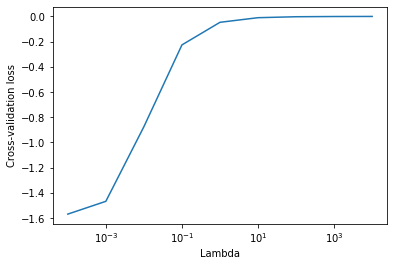

In [46]:
plt.plot(lambdas, loss_average_list)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation loss')
plt.show()

## Deliverable 3

Indicate the value of 𝜆 value that generated the smallest CV(5) error.

It is clear from this plot that a lambda value of $10^{-4}$ produced the lowest cross-validation error.

## Deliverable 4

Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁=183 observations to obtain an estimate of the (𝑝+1)×𝐾 model parameter matrix as 𝐁̂ and make predictions of the probability for each of the 𝐾=5 classes for the 111 test individuals located in TestData_N111_p10.csv. Report all six values (probability for each of the 𝐾=5 classes and the most probable ancestry label) for all 111 test individuals.

In [47]:
test_data=pd.read_csv('TestData_N111_p10.csv')

In [48]:
X_test=test_data.drop(['Ancestry'], axis=1)
y_test=test_data['Ancestry']

In [49]:
X_test.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [50]:
label_encoder=LabelEncoder()

Y_test=label_encoder.fit_transform(y_test)

In [51]:
logistic_regression=LogisticRegression(C=1e4, max_iter=10000)
logistic_regression.fit(X, Y)
print(logistic_regression.coef_)    

[[-5.34517556  0.51250203 -0.88016302 -0.29069893  0.17493901 -0.26823935
  -0.12000857  0.11485333  0.26402631 -0.08924062]
 [ 2.68327971  3.43037113 -0.74253943  6.92092164 -0.87918091 -0.76144314
  -0.26038133 -1.07242338 -0.18316134 -0.66099446]
 [ 0.26193942 -6.80243965  2.23722123  0.37217198 -0.11076521  0.78410475
   0.4027696  -1.10527509 -0.55563579 -0.17754599]
 [ 2.2145872   0.18775547 -5.0556616  -3.52272142  0.28276446 -0.20717274
  -0.28269151  1.52928788  1.76341433  0.69300383]
 [ 0.18536922  2.67181101  4.44114282 -3.47967327  0.53224265  0.45275047
   0.26031181  0.53355725 -1.28864351  0.23477724]]


In [52]:
prediction_probs=logistic_regression.predict_proba(X_test)
predictions=np.argmax(prediction_probs, axis=1)

prediction_probs=pd.DataFrame(prediction_probs)
prediction_probs.columns=['African', 'EastAsian', 'European', 'NativeAmerican', 'Oceanian']

predictions=pd.DataFrame(predictions)
predictions.columns=['Most Probable Class']

results=pd.concat([prediction_probs, predictions], axis=1)

classes=['African', 'EastAsian', 'European', 'NativeAmerican', 'Oceanian']

i=0
for index in results['Most Probable Class']:
    results['Most Probable Class'][i]=classes[index]
    i+=1

results

C:\Users\mkell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\mkell\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,African,EastAsian,European,NativeAmerican,Oceanian,Most Probable Class
0,1.235951e-37,4.834428e-36,1.511854e-38,1.819932e-38,1.000000e+00,Oceanian
1,5.448675e-37,4.639147e-26,1.056133e-34,1.000000e+00,9.571173e-29,NativeAmerican
2,8.985015e-17,7.807963e-11,1.000000e+00,9.686561e-19,4.144839e-15,European
3,1.000000e+00,2.442264e-38,8.576285e-37,1.253924e-36,4.924071e-21,African
4,1.203866e-40,1.000000e+00,2.516578e-42,2.312987e-30,4.755529e-38,EastAsian
...,...,...,...,...,...,...
106,1.000000e+00,1.048095e-38,1.425641e-36,1.377907e-34,6.991538e-27,African
107,1.000000e+00,9.467930e-25,5.482763e-20,1.040564e-27,9.035667e-23,African
108,1.000000e+00,3.628602e-29,4.979066e-32,1.421035e-26,5.685677e-25,African
109,1.000000e+00,6.414101e-31,1.969233e-21,2.017887e-18,1.019127e-19,African


## Deliverable 5

How do the class label probabilities differ for the Mexican and African American when compared to the class label probabilities for the unknown samples? Are these class probabilities telling us something about recent history? Explain why these class probabilities are reasonable with respect to knowledge of recent history.

Each of the unknown samples is distinct. The samples with African American ancestry are often labeled as African or European by our model. The Mexican samples are often labeled Native American or European. This makes sense since a lot of Africans were brought to Europe or the Americas via the slave trade. Also, what we now call "Mexicans" were originally Native Americans before Europeans came to their land, so it makes sense that there is a mixture of Native American and European ancestry among modern-day Mexican individuals.